# Data Preprocess (MNIST)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

# 데이터 불러오기
TensorFlow에서 제공해주는 데이터셋(MNIST) 예제 불러오기 

In [3]:
from tensorflow.keras import datasets

- 데이터 shape 확인하기

In [5]:
# 데이터 불러오기
mnist = datasets.mnist

In [6]:
# load
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
train_x.shape

(60000, 28, 28)

# Image Dataset 들여다보기

불러온 데이터셋에서 이미지 데이터 하나만 뽑아서 시각화까지 확인

- 데이터 하나만 뽑기

In [9]:
image = train_x[0]
image.shape

(28, 28)

- 시각화해서 확인

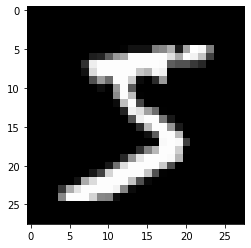

In [10]:
plt.imshow(image, 'gray')
plt.show()

# Channel 관련

[Batch Size, Height, Width, Channel]  
GrayScale이면 1, RGB이면 3으로 만들어줘야함

- 다시 shape로 데이터 확인

In [11]:
train_x.shape

(60000, 28, 28)

- 데이터 차원수 늘리기 (numpy)
    - expand_dims

In [13]:
# 마지막 열 추가하기
expand_data = np.expand_dims(train_x, -1)
expand_data.shape

(60000, 28, 28, 1)

- TensorFlow 패키지 불러와 데이터 차원수 늘리기 (tensorflow)

In [14]:
new_train_x = tf.expand_dims(train_x,-1)
new_train_x.shape

TensorShape([60000, 28, 28, 1])

- TensorFlow 공홈에서 가져온 방법 tf.newaxis

In [16]:
train_x[..., tf.newaxis].shape

(60000, 28, 28, 1)

In [18]:
train_x.reshape([60000,28,28,1]).shape

(60000, 28, 28, 1)

*주의 사항  
matplotlib로 이미지 시각화 할 때는 gray scale의 이미지는 3번쨰 dimension이 없으므로,  
2개의 dimension으로 gray scale로 차원 조절해서 넣어줘야함

- new_train_x[0] -> new_train_x[0, :, :, 0]

In [23]:
new_train = train_x[..., tf.newaxis]
new_train.shape

(60000, 28, 28, 1)

In [24]:
# 시각화할때는 3개가 있으면 안됨

disp = new_train[0]
disp.shape

(28, 28, 1)

In [27]:
# 3번째 dimension 제거하기

disp1 = np.squeeze(new_train[0])
disp1.shape

(28, 28)

In [28]:
# 3번째 dimension 제거하기
# [가져올 데이터 번호, :,:,0]

disp2 = new_train[0, :,:,0]
disp2.shape

(28, 28)

- 다시 시각화

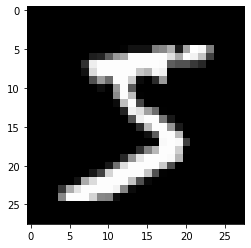

In [33]:
plt.imshow(disp2,'gray')
plt.show()

# Label Dataset 들여다보기  

Label 하나를 열어서 Image와 비교하여 제대로 들어갔는지. 어떤 식으로 저장 되어있는지 확인

- label 하나만 뽑아보기

In [34]:
train_y.shape

(60000,)

In [36]:
# train_x[0]의 값

train_y[0]

5

- Label 시각화 

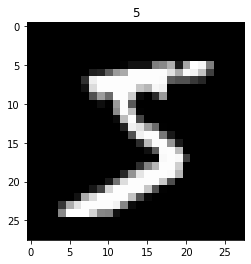

In [37]:
plt.title(train_y[0])
plt.imshow(train_x[0],'gray')
plt.show()

# OneHot Encoding



컴퓨터가 이해할 수 있는 형태로 변환해서 Label을 주도록 함

In [0]:
# 5
[0,0,0,0,0,1,0,0,0,0]

# 9
[0,0,0,0,0,0,0,0,0,1]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

- tensorflow.keras.utils.to_categorical

In [38]:
# 컴퓨터가 이해할수 있는 형태로 변환하는 라이브러리
from tensorflow.keras.utils import to_categorical

- 1을 예시로 one hot encoding

In [40]:
to_categorical(0,10)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [42]:
to_categorical(5,10)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

- label 확인해서 to_categorical 사용

In [46]:
label_onehot = to_categorical(train_y[0],10)
label_onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

- onehot encoding으로 바꾼 것과 이미지 확인

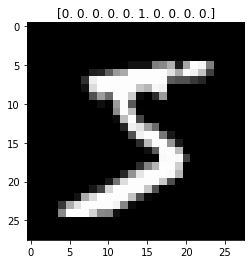

In [47]:
plt.title(label_onehot)
plt.imshow(train_x[0],'gray')
plt.show()